<a href="https://colab.research.google.com/github/annshita/IoT-Anomaly-Detection/blob/main/IoT_Anomaly_Detection_Edge_IIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPPORT VECTOR MACHINE**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
filepath = "ML-EdgeIIoT-dataset.csv"

In [ ]:
df = pd.read_csv(filepath)

<ipython-input-29-7248a6640290>:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:
df.shape

(157800, 63)

In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal,24301
DDoS_UDP,14498
DDoS_ICMP,14090
Ransomware,10925
DDoS_HTTP,10561
SQL_injection,10311
Uploading,10269
DDoS_TCP,10247
Backdoor,10195


In [ ]:
df['Attack_label'].value_counts()

,count
Attack_label,
1,133499
0,24301


In [ ]:
mixed_type_columns = [col for col in df.columns if df[col].apply(type).nunique() > 1]
print("Columns with mixed data types:", mixed_type_columns)

Columns with mixed data types: ['arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'tcp.options', 'tcp.payload', 'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic']


In [ ]:
print(df.columns.tolist())

['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.t

In [ ]:
X = df[[ 'arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label']]
Y = df['Attack_type']

In [ ]:
SVM_classifier = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True).fit(X_train, Y_train)
print()
print(SVM_classifier.score(X_test, Y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

[LibSVM]
0.29198352344740175

['Backdoor' 'DDoS_UDP' 'Normal' ... 'DDoS_UDP' 'Normal' 'Normal']

program end...

time cost: 
3057.57635307312 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred, zero_division=0))

Classifiction Report :
                       precision    recall  f1-score   support

             Backdoor       0.35      0.43      0.39      2061
            DDoS_HTTP       0.00      0.00      0.00      2104
            DDoS_ICMP       0.00      0.00      0.00      2811
             DDoS_TCP       0.58      0.54      0.56      2076
             DDoS_UDP       0.29      1.00      0.45      2842
       Fingerprinting       0.00      0.00      0.00       203
                 MITM       0.00      0.00      0.00       243
               Normal       0.23      0.64      0.34      4830
             Password       0.00      0.00      0.00      1994
        Port_Scanning       0.42      0.02      0.03      2078
           Ransomware       0.30      0.57      0.39      2120
        SQL_injection       0.00      0.00      0.00      2087
            Uploading       0.00      0.00      0.00      2059
Vulnerability_scanner       0.00      0.00      0.00      2041
                  XSS       0.0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.17081287520840888
Recall: 0.29198352344740175
F1 Score: 0.18426766441735118


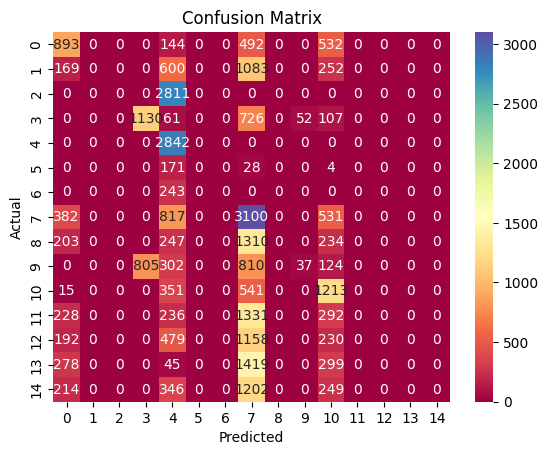

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**DECISION TREE**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
filepath = "ML-EdgeIIoT-dataset.csv"

In [ ]:
df = pd.read_csv(filepath)

<ipython-input-3-7248a6640290>:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
X = df[[ 'arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label']]
Y = df['Attack_type']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

DT.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score:')
score = DT.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
['Uploading' 'Normal' 'SQL_injection' ... 'DDoS_UDP' 'Normal' 'Ransomware']

Score:
0.9209442332065906
program end...

time cost: 
1.1597075462341309 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred,zero_division=0))

Classifiction Report :
                       precision    recall  f1-score   support

             Backdoor       0.97      0.95      0.96      2061
            DDoS_HTTP       0.78      0.80      0.79      2104
            DDoS_ICMP       1.00      1.00      1.00      2811
             DDoS_TCP       1.00      1.00      1.00      2076
             DDoS_UDP       1.00      1.00      1.00      2842
       Fingerprinting       0.90      0.77      0.83       203
                 MITM       0.42      1.00      0.60       243
               Normal       1.00      1.00      1.00      4830
             Password       0.81      0.80      0.81      1994
        Port_Scanning       0.93      0.96      0.95      2078
           Ransomware       0.96      0.86      0.91      2120
        SQL_injection       0.80      0.81      0.80      2087
            Uploading       0.86      0.87      0.87      2059
Vulnerability_scanner       0.97      0.97      0.97      2041
                  XSS       0.8

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9265097374433774
Recall: 0.9209442332065906
F1 Score: 0.9224616480854861


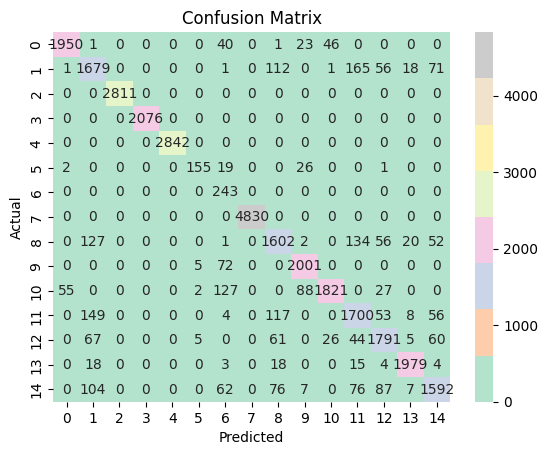

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel2")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**NAIVE BAYES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.88027223, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.14580663, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.53628762, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


0.4964828897338403

['DDoS_TCP' 'DDoS_TCP' 'DDoS_TCP' ... 'Normal' 'Vulnerability_scanner'
 'DDoS_ICMP']

program end...

time cost: 
0.888232946395874 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred, zero_division=0))

Classifiction Report :
                       precision    recall  f1-score   support

             Backdoor       0.47      0.45      0.46      2018
            DDoS_HTTP       0.00      0.00      0.00      2167
            DDoS_ICMP       0.81      1.00      0.90      2858
             DDoS_TCP       0.15      1.00      0.26      2054
             DDoS_UDP       1.00      1.00      1.00      2938
       Fingerprinting       1.00      0.09      0.17       205
                 MITM       1.00      0.33      0.50       242
               Normal       1.00      1.00      1.00      4842
             Password       0.00      0.00      0.00      1945
        Port_Scanning       0.54      0.08      0.14      2012
           Ransomware       0.75      0.06      0.11      2085
        SQL_injection       0.28      0.25      0.26      2138
            Uploading       0.00      0.00      0.00      2059
Vulnerability_scanner       0.66      0.57      0.62      2000
                  XSS       0.0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.5187492821818113
Recall: 0.4964828897338403
F1 Score: 0.45199648417762994


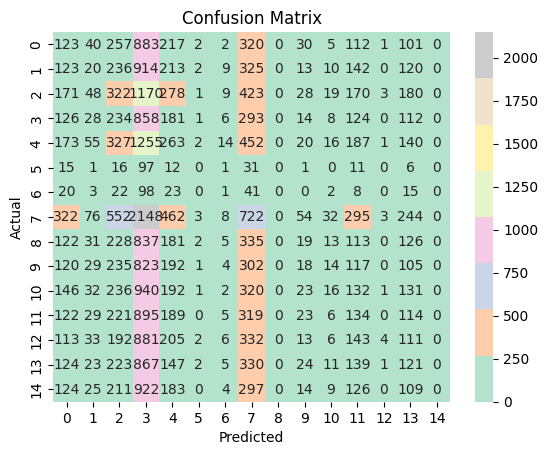

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel2")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('ML-EdgeIIoT-dataset.csv')

<ipython-input-18-9b14bc8c8420>:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ML-EdgeIIoT-dataset.csv')


In [ ]:
X=data[[ 'arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label']]

In [ ]:
y=data['Attack_type']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                        precision    recall  f1-score   support

             Backdoor       0.46      0.75      0.57      2093
            DDoS_HTTP       0.41      0.52      0.46      2127
            DDoS_ICMP       1.00      0.99      0.99      2822
             DDoS_TCP       0.87      0.90      0.88      1985
             DDoS_UDP       1.00      0.99      0.99      2905
       Fingerprinting       0.76      0.55      0.64       191
                 MITM       0.37      1.00      0.54       233
               Normal       1.00      1.00      1.00      4921
             Password       0.37      0.16      0.23      2012
        Port_Scanning       0.81      0.95      0.88      1960
           Ransomware       0.35      0.38      0.36      2172
        SQL_injection       0.28      0.48      0.35      2057
            Uploading       0.55      0.08      0.14      2041
Vulnerability_scanner       0.79      0.77      0.78      2017
                  XSS       0.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.08364522856270265
Recall: 0.0826362484157161
F1 Score: 0.07973266041737165


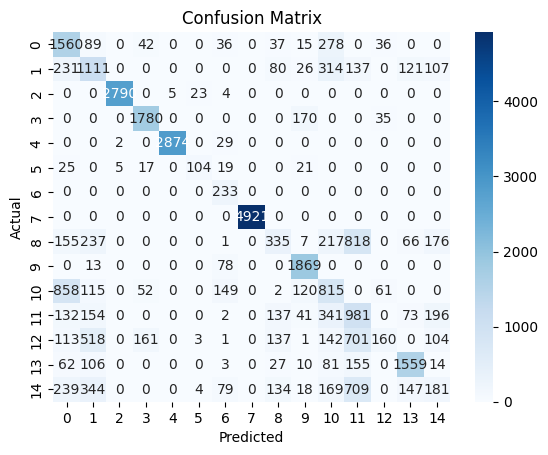

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

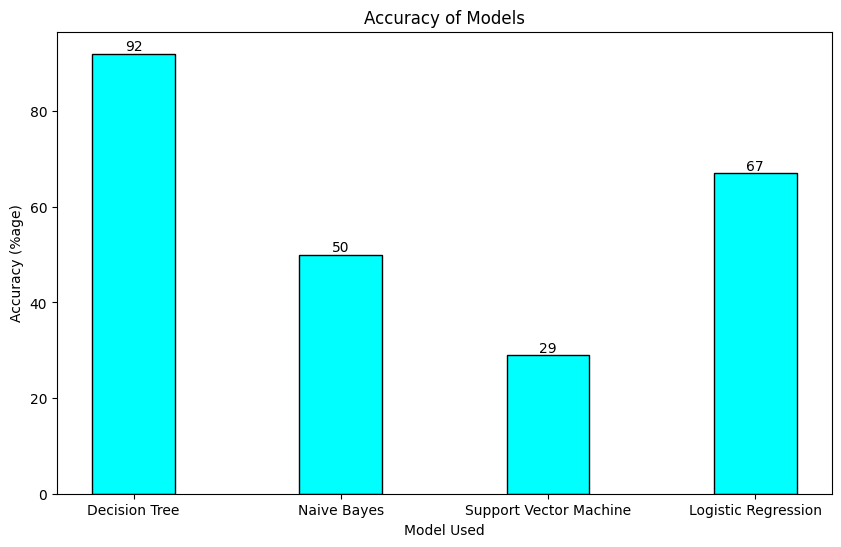

In [ ]:
import matplotlib.pyplot as plt
categories = ['Decision Tree', 'Naive Bayes', 'Support Vector Machine', 'Logistic Regression']
values = [92, 50, 29, 67]
plt.figure(figsize=(10, 6))
bars=plt.bar(categories, values, color='cyan', edgecolor='black', width=0.4)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Model Used')
plt.ylabel('Accuracy (%age)')
plt.title('Accuracy of Models')
plt.show()